In [1]:
#import libraries
import qiskit
from qiskit import*
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi
from numpy.random import randint
import numpy as np
from qiskit.quantum_info import random_statevector, Statevector
import random

# Original qubit without error

In [2]:
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)

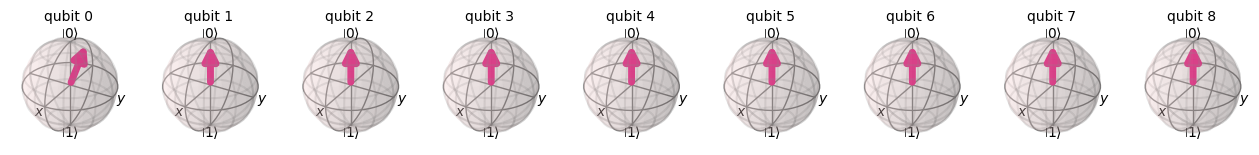

In [3]:
# Initialize q[0] to a random state
alpha = random.uniform(-1, 1)
beta = sqrt(1-alpha**2)*(-1)**(random.randrange(0,1,1))
circuit.initialize([alpha,beta], 0)
# Original state vector for all 9 qubits
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

{'000000000': 870, '000000001': 154}


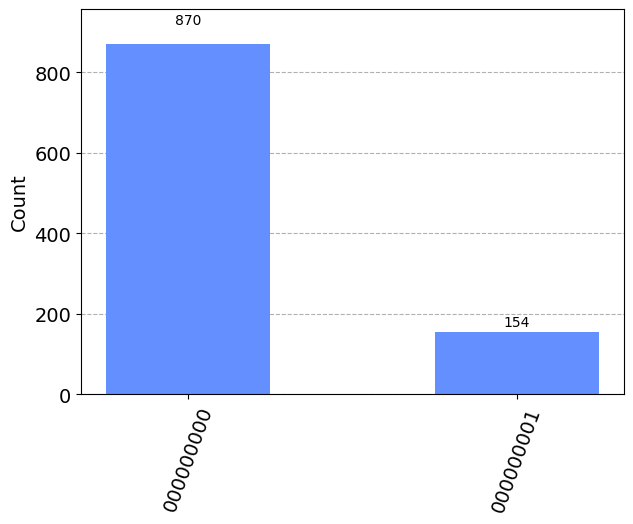

In [4]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 1st qubit

In [5]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[0])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)
print(circuit)

      ┌──────────────────────────────┐          ┌───┐           ░ ┌───┐ ░      »
q4_0: ┤ Initialize(-0.91899,0.39427) ├──■────■──┤ H ├──■────■───░─┤ X ├─░───■──»
      └──────────────────────────────┘  │    │  └───┘┌─┴─┐  │   ░ └───┘ ░ ┌─┴─┐»
q4_1: ──────────────────────────────────┼────┼───────┤ X ├──┼───░───────░─┤ X ├»
                                        │    │       └───┘┌─┴─┐ ░       ░ └───┘»
q4_2: ──────────────────────────────────┼────┼────────────┤ X ├─░───────░──────»
                                      ┌─┴─┐  │  ┌───┐     └───┘ ░       ░      »
q4_3: ────────────────────────────────┤ X ├──┼──┤ H ├──■────■───░───────░───■──»
                                      └───┘  │  └───┘┌─┴─┐  │   ░       ░ ┌─┴─┐»
q4_4: ───────────────────────────────────────┼───────┤ X ├──┼───░───────░─┤ X ├»
                                             │       └───┘┌─┴─┐ ░       ░ └───┘»
q4_5: ───────────────────────────────────────┼────────────┤ X ├─░───────░──────»
                            

{'000000110': 845, '000000111': 179}


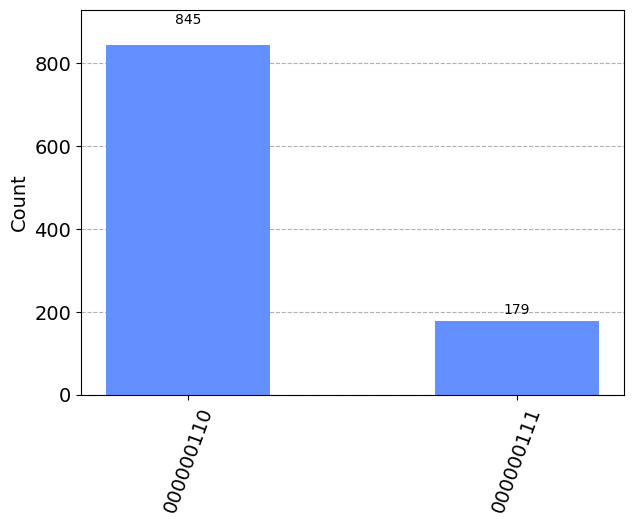

In [6]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 2nd qubit

In [7]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[1])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)
print(circuit)

       ┌──────────────────────────────┐          ┌───┐           ░       ░ »
q12_0: ┤ Initialize(-0.91899,0.39427) ├──■────■──┤ H ├──■────■───░───────░─»
       └──────────────────────────────┘  │    │  └───┘┌─┴─┐  │   ░ ┌───┐ ░ »
q12_1: ──────────────────────────────────┼────┼───────┤ X ├──┼───░─┤ X ├─░─»
                                         │    │       └───┘┌─┴─┐ ░ └───┘ ░ »
q12_2: ──────────────────────────────────┼────┼────────────┤ X ├─░───────░─»
                                       ┌─┴─┐  │  ┌───┐     └───┘ ░       ░ »
q12_3: ────────────────────────────────┤ X ├──┼──┤ H ├──■────■───░───────░─»
                                       └───┘  │  └───┘┌─┴─┐  │   ░       ░ »
q12_4: ───────────────────────────────────────┼───────┤ X ├──┼───░───────░─»
                                              │       └───┘┌─┴─┐ ░       ░ »
q12_5: ───────────────────────────────────────┼────────────┤ X ├─░───────░─»
                                            ┌─┴─┐┌───┐     └───┘ ░       ░ »

{'000000010': 871, '000000011': 153}


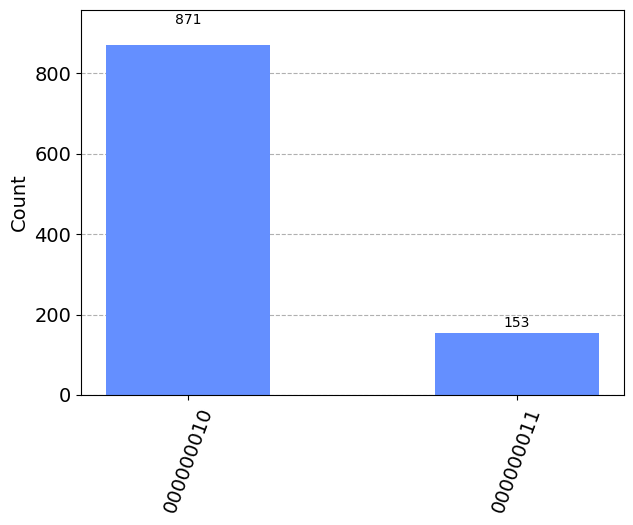

In [8]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 3rd qubit

In [9]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[2])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'000000100': 866, '000000101': 158}


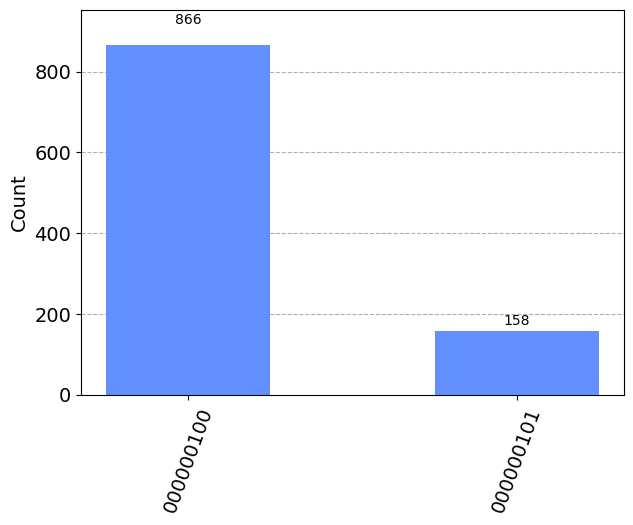

In [10]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 4th qubit

In [11]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[3])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'000110000': 856, '000110001': 168}


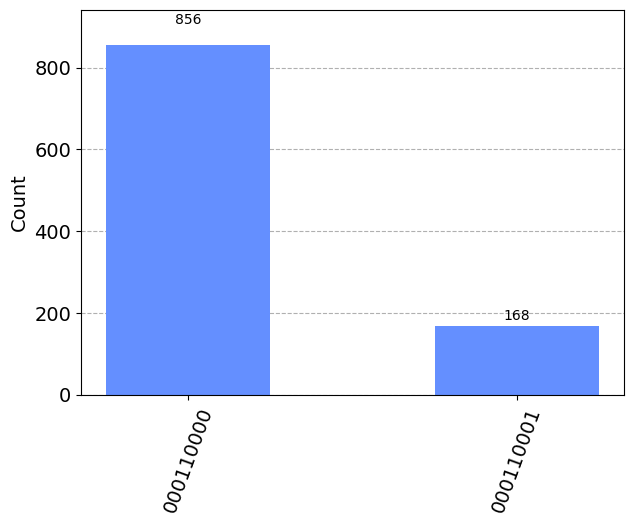

In [12]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 5th qubit

In [13]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[4])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'000010000': 867, '000010001': 157}


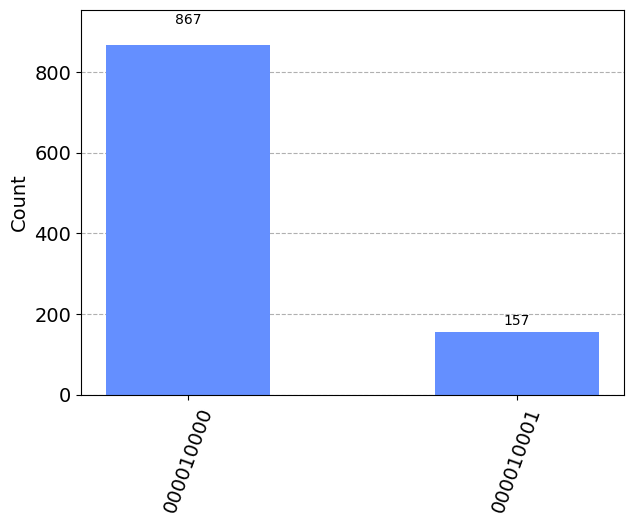

In [14]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 6th qubit

In [15]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[5])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'000100000': 849, '000100001': 175}


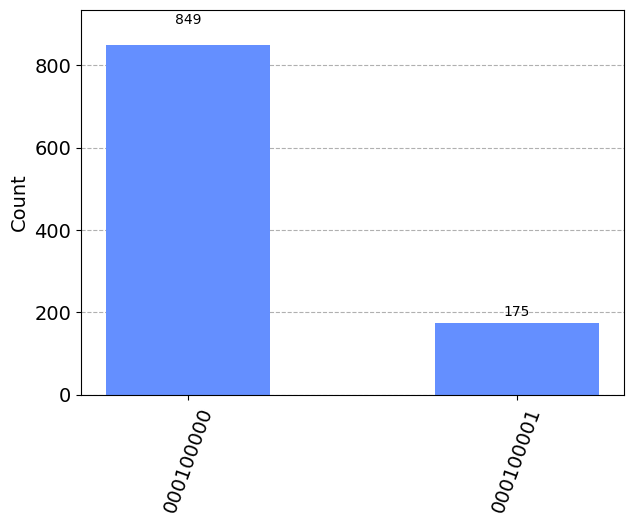

In [16]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 7th qubit

In [17]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[6])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'110000000': 855, '110000001': 169}


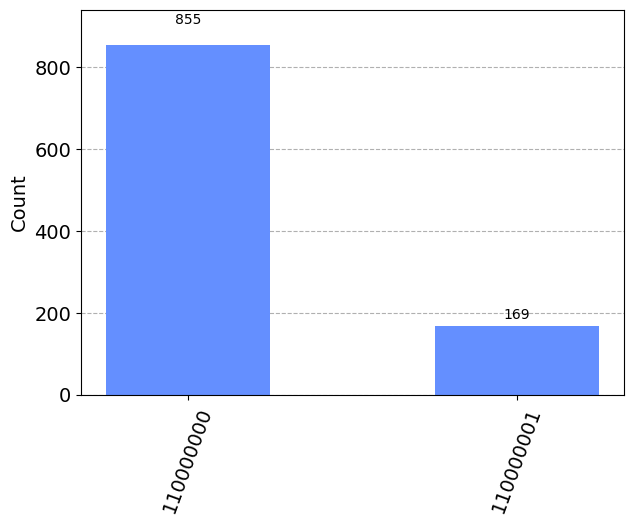

In [18]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 8th qubit

In [19]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[7])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'010000000': 868, '010000001': 156}


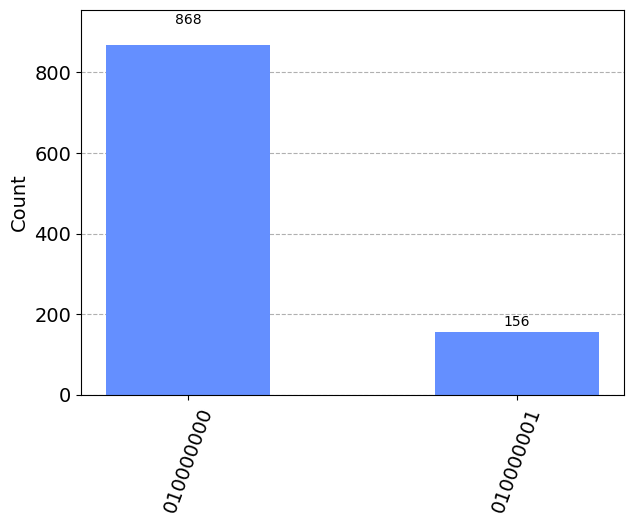

In [20]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bit-flip Error on 9th qubit

In [21]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.x(q[8])#Bit flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'100000000': 864, '100000001': 160}


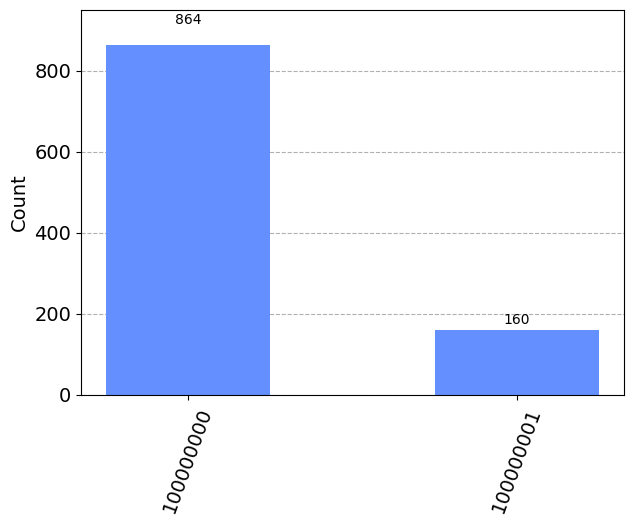

In [22]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Phase-flip Error on 1st group

In [23]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.z(q[0])#Phase flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'001001000': 858, '001001001': 166}


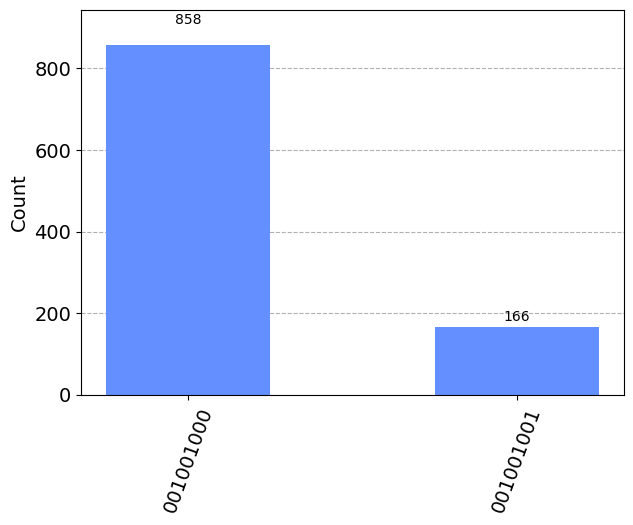

In [24]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Phase-flip Error on 2nd group

In [25]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.z(q[3])#Phase flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'000001001': 168, '000001000': 856}


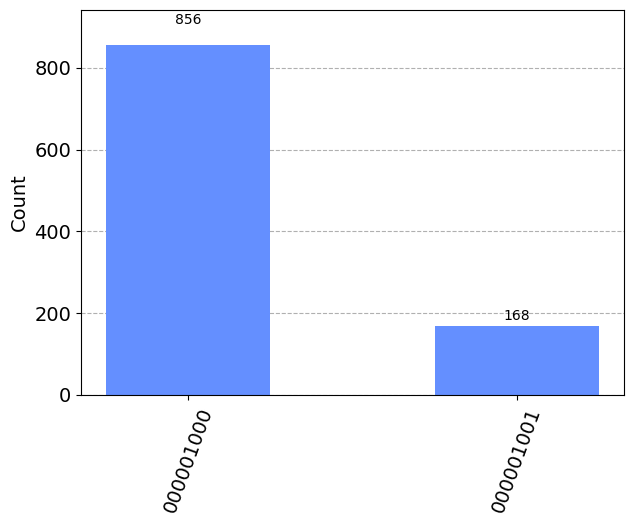

In [26]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Phase-flip Error on 3rd group

In [27]:
# Apply Shor code 
q = QuantumRegister(9)
c = ClassicalRegister(9)
circuit = QuantumCircuit(q,c)
circuit.initialize([alpha,beta], 0)

# Encode
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

## Error occurs
circuit.z(q[6])#Phase flip error
circuit.barrier(q)

# Repair
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])
circuit.barrier(q)

{'001000000': 878, '001000001': 146}


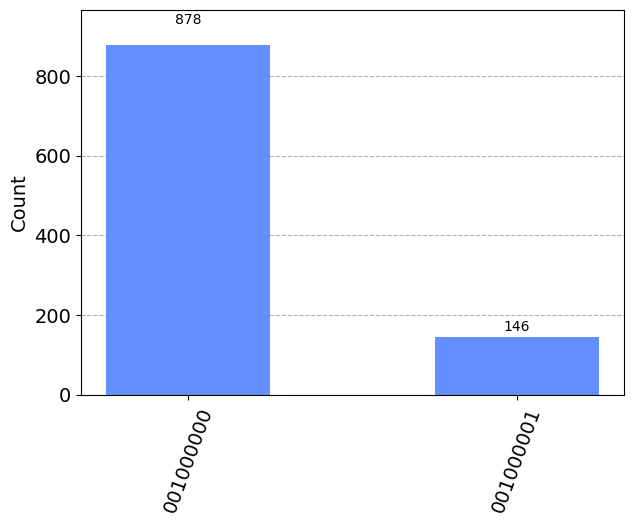

In [28]:
circuit.measure(q,c)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)